In [1]:
pwd

'/home/user/PycharmProjects/Prometheus_basic_study/teams/team2/wk5'

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('Loan_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [6]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [7]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [8]:
na_idx = data['LoanAmount'][data['LoanAmount'].isna()].index
data['LoanAmount'].mean()

146.41216216216216

In [9]:
cat_columns = data.select_dtypes(['object']).columns
# float_columns = data.select_dtypes(['float64']).columns
# int_columns = data.select_dtypes(['int64']).columns

data[cat_columns] = data[cat_columns].fillna('Nan')
data[['LoanAmount', 'Loan_Amount_Term']] = data[['LoanAmount', 'Loan_Amount_Term']].fillna(data[['LoanAmount', 'Loan_Amount_Term']].mean())
data['Credit_History'].fillna(2, inplace=True)
# data[['Credit_History']].fillna(2, inplace=True)

# data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
pd.factorize(data['Dependents'])

(array([0, 1, 0, 0, 0, 2, 0, 3, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1,
        0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 3, 0, 1, 0, 0,
        0, 1, 3, 0, 0, 2, 0, 3, 3, 0, 0, 1, 3, 3, 0, 1, 2, 0, 1, 0, 2, 0,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 4, 1, 2, 0, 2, 3,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 4, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0,
        0, 0, 0, 3, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2,
        0, 3, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0,
        2, 3, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 2, 3, 1, 2, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 0, 0, 2, 2,
        0, 2, 0, 0, 0, 0, 4, 2, 4, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1,
        0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 3, 0, 3, 0, 3, 1, 0, 1, 0,
        0, 0, 2, 3, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 2, 4, 0, 3, 

In [12]:
data['Credit_History'].unique()

array([1., 0., 2.])

In [13]:
cat_columns = data.select_dtypes(['object']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB


In [15]:
data['Dependents'].unique()

array([0, 1, 2, 3, 4])

In [16]:
data['Gender'].unique()

array([0, 1, 2])

In [17]:
data['Credit_History'].unique()

array([1., 0., 2.])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Loan_ID', 'Loan_Status'], axis=1), data['Loan_Status'], 
                                                    test_size=0.2, random_state=1004, stratify=data['Loan_Status'])

np.mean(y_train), np.mean(y_test)

(0.3136456211812627, 0.3089430894308943)

In [19]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([337, 154])), (array([0, 1]), array([85, 38])))

In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=200)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7804878048780488

In [22]:
from sklearn.svm import SVC

svc = SVC(kernel = 'poly', random_state = 42, gamma = 'scale', C = 1)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6910569105691057

In [23]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(bootstrap=True,     # 부트스트랩 샘플링 사용 여부
                            class_weight=None,  # 클래스별 가중치
                            criterion='gini',   # 불순도 측정 방법
                            max_depth=3,    # 트리의 최대 깊이
                            max_features='sqrt',    # 최적의 분할을 위해 고려할 최대 특성 수
                            n_estimators=50,   # 생성할 트리의 개수
                            oob_score=True,     # out of bag score
                            n_jobs=1,        # 병렬 처리할 작업 수
                            min_impurity_decrease=0.0,  # 트리를 분기하기 위해 필요한 최소 불순도 감소
                            random_state=42)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.7804878048780488

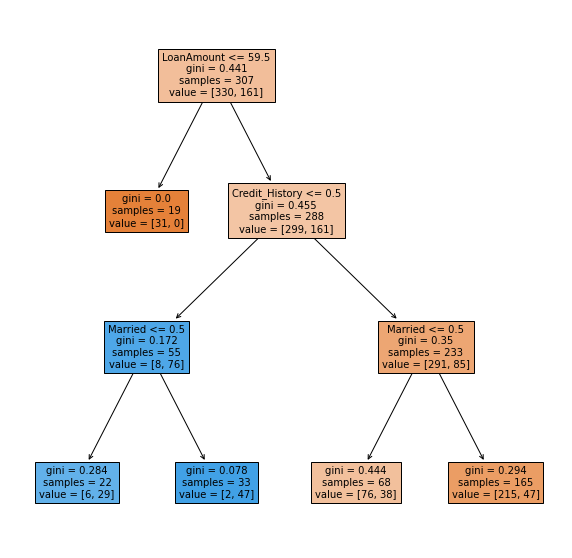

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(tree.estimators_[10], feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

In [25]:
1- np.mean(y_test)

0.6910569105691057

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, 
                                      learning_rate=0.07,
                                      max_depth=3, 
                                      random_state=42)

gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7723577235772358

In [33]:
from sklearn.model_selection import GridSearchCV

gb_model_params = {
    'n_estimators': [50, 75, 100, 125, 150],
    'max_depth': [2, 3, 5, 10],
    'learning_rate': np.linspace(0.01, 0.1, 5).tolist(),
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

grid_cv = GridSearchCV(gb_model, param_grid=gb_model_params, cv=5, n_jobs=-1, refit=True)
grid_cv.fit(X_train, y_train)

print(f"Best parameters: {grid_cv.best_params_}")
print("Best cross-validation score: {:.4f}".format(grid_cv.best_score_))

best_estimator = grid_cv.best_estimator_
y_pred = best_estimator.predict(X_test)
accuracy_score(y_test, y_pred)

Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.7}
Best cross-validation score: 0.8167


0.7723577235772358

In [41]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, 
                      learning_rate=0.02, 
                      max_depth=3,
                      n_jobs=-1,
                      random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
accuracy_score(y_test, y_pred)

0.7804878048780488